<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> Juan Ospina
<br>
<i><b>Asignatura:</b></i> Inteligencia Artificial.
<br>
<i><b>Tema:</b></i> Regresión polinomial y regularización.
<br>
<i><b>Estudiantes</b></i>
  <li>Hugo Espinosa </li> 
  <li>Juan Esteban Arias </li>
  <li>Juan Camilo Hernandez Ibañez</li>
  <li>Santiago Javier Vivas Piamba</li>

</FONT>
</div>

# __Regularización__

La regularización es una técnica que nos permite evitar el sobreajuste en nuestre modelo. En este notebook se presetan los métodos de regularización L1 y L2 para los modelos de regresión.

# __Overfitting y Underfitting__

Antes de ver las técnicas de regularización veamos un caso en cual se presenta un caso de overfitting y underfitting para un modelo de regresión.

#__Primer Punto__
____
Se han entrenado cuatro modelos utilizando los mismos datos, pero diferentes hiperparámetros. 

La siguiente tabla presenta los resultados obtenidos.

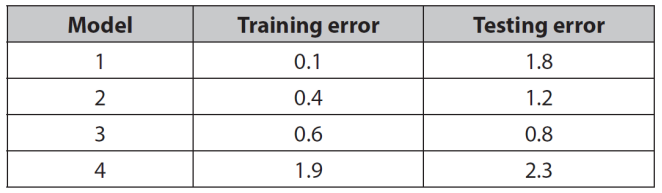


*   ¿Cuál modelo seleccionaría?

>El modelo ideal es el modelo número 3. Este presenta el menor error acumulado entre entrenamiento y prueba. Además, presenta el menor error en los datos de prueba, lo que significa que el modelo no solo se ajusta a los datos de entrenamiento, sino que también hace buenas predicciones con los datos de prueba (No hay underfitting o overfitting). Esto se traduce a que el modelo probablemente haga buenas predicciones sobre otros datos que no conoce. 

*   ¿Cuál modelo parece tener underfitting?

>El modelo número 4 presenta underfitting, ya que el error es muy alto tanto en los datos de prueba como entrenamiento. Esto significa que el modelo no está capturando ningún patrón significativo en los datos (No está generalizando).

*   ¿Cuál modelo parece tener overfitting?

>El modelo número 1 parece presentar mucho overfitting, ya que el error en los datos de entrenamiento es extremadamente bajo y el error en los datos de prueba es muy alto (Está memorizando los datos de entrenamiento. Sobregeneralización). El modelo número 2 también parece presentar overffiting por los mismos motivos, aunque en menor medida.

#__Segundo Punto__
____
El siguiente conjunto de datos fue utilizando para entrenar un modelo de regresión polinomial que permite predecir los valores de 𝑦 como 𝑦̂, donde 𝑦̂ = 2𝑥 2 − 5𝑥 + 4. Si el parámetro de regularización es 𝜆 = 0.1 determine el valor del error del modelo para la regularización L1 y L2. Realice los cálculos de manera manual.

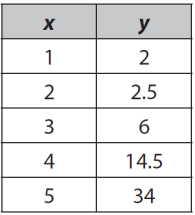

#__Tercer Punto__
____

In [ ]:
# Se importan las librerias correspondientes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer, PolynomialFeatures
from sklearn.metrics import pairwise_distances, accuracy_score, mean_squared_error,precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error

In [ ]:
# Se cargan los datos en un dataframe
df = pd.read_csv("https://raw.githubusercontent.com/jpospinalo/MachineLearning/main/Linear%20Regression/position.csv") 
df

,times,accel
0,2.4,0.0
1,2.6,-1.3
2,3.2,-2.7
3,3.6,0.0
4,4.0,-2.7
...,...,...
128,53.2,-14.7
129,55.0,-2.7
130,55.0,10.7
131,55.4,-2.7


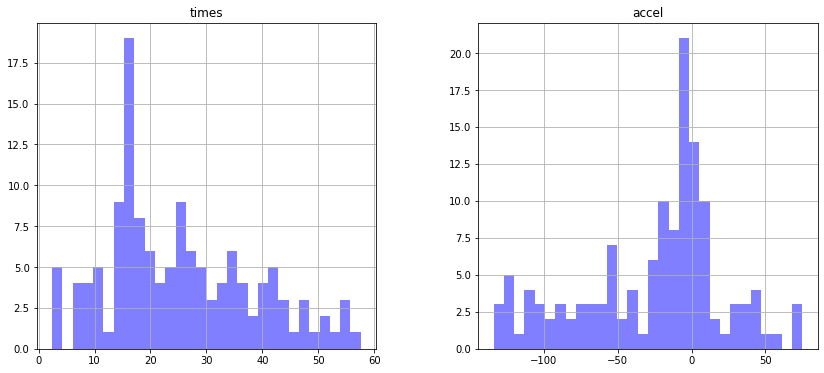

In [ ]:
# Hitogramas de las caracteristicas
df.hist(bins=30, figsize=(14,6), color="blue", alpha=0.5) 
plt.show()

In [ ]:
x = df["times"].values.reshape(-1,1)
y = df["accel"]
size = x.shape[0]

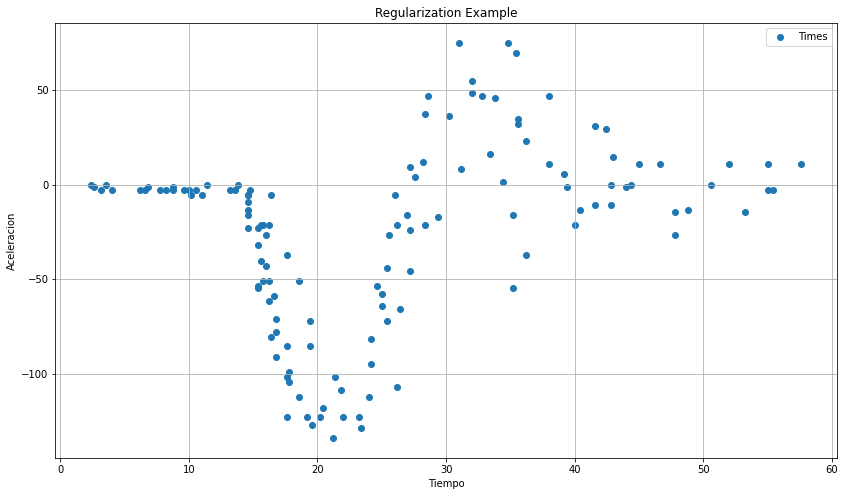

In [ ]:
# Diagrama de dispersion eje x (tiempo) / eje y (aceleracion)
plt.figure(figsize=(14, 8))
plt.scatter(x, y, label='Times')
plt.title('Regularization Example')
plt.ylabel("Aceleracion")
plt.xlabel("Tiempo")
plt.legend()
plt.grid()

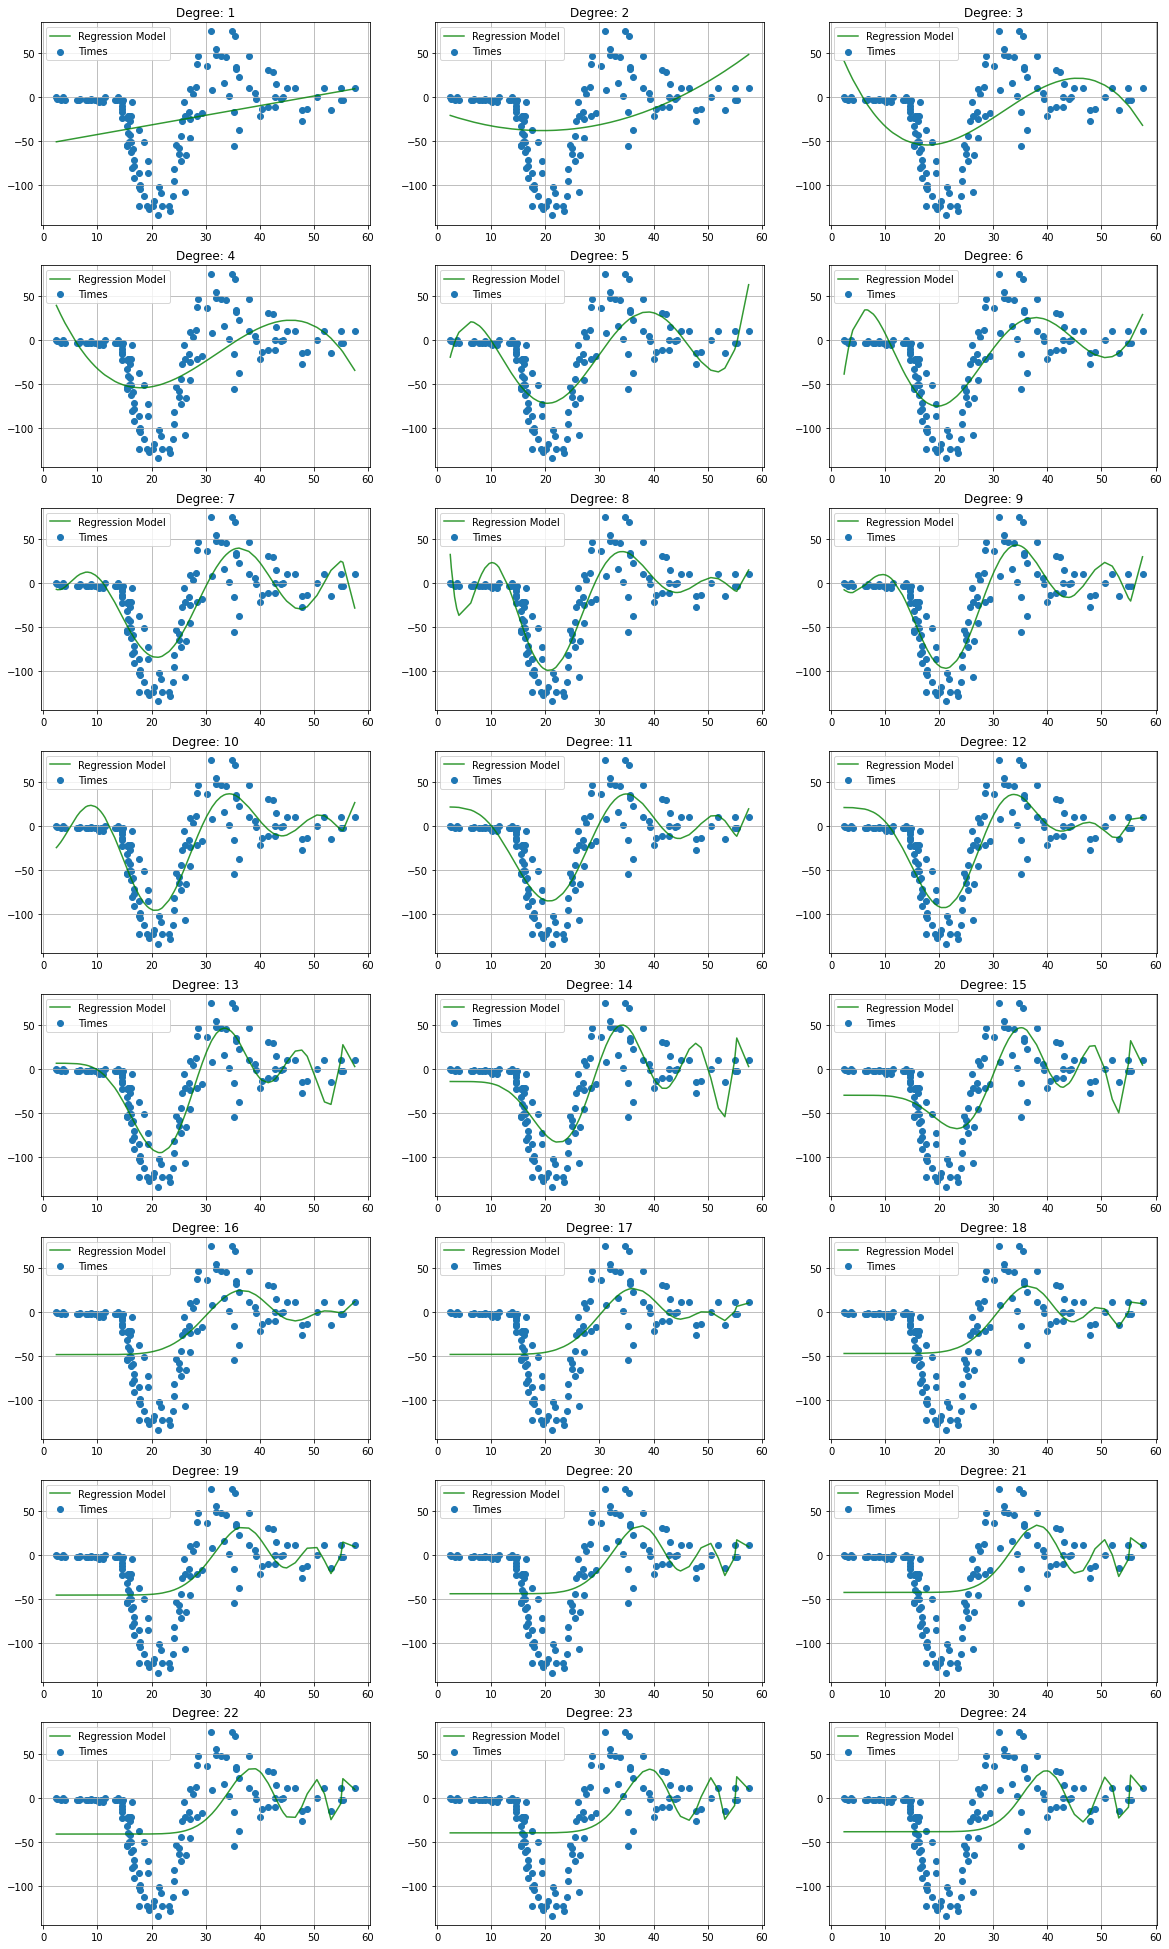

In [ ]:
plt.figure(figsize=(20, 35))

pr = LinearRegression()
grados = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
error_absoluto = []
y_pred = []
i = 1

for grado in grados:
  polinomio = PolynomialFeatures(degree=grado, include_bias=False)
  X_pol = polinomio.fit_transform(x)
  pr.fit(X_pol, y)
  y_pred = pr.predict(X_pol)
  error_absoluto.append(mean_absolute_error(y_pred,y))
  plt.subplot(8, 3, i)
  plt.scatter(x, y, label='Times')
  plt.plot(x, y_pred, color='green', alpha= 0.8, label='Regression Model')
  plt.legend()
  plt.grid()
  i +=1
  plt.title(f'Degree: {grado}')

In [ ]:
# Errores obtenidos por los modelos 
error_absoluto

[37.1303847521178,
 36.288393597022136,
 32.810897279283374,
 32.82108441800696,
 26.833809319397997,
 26.43031429878604,
 23.92557898595348,
 21.190412763631542,
 21.24222310514976,
 22.135717691572378,
 23.65894629151415,
 21.783027701563796,
 20.77824711278072,
 24.948243637587158,
 29.671109423277397,
 33.4765837821855,
 33.39034404728441,
 33.545198852444265,
 33.889645813776525,
 34.38866131922503,
 34.84872686507067,
 35.207531764847,
 35.522022224985534,
 35.86348057934685]

# Mejor modelo de regresion

Para verificar la efectividad de cada uno de los modelos se hace uso de la metrica de rendimiento *mean_absolute_error()* el cual nos retorna el error obtenido por cada uno de estos. 
Analisando los resultados obtenidos en la tasa de errores, se logra extraer el minimo error con un valor de **20.77824**,el cual fue arrojado por el polinomio de grado 13.

In [ ]:
# Minimo error obtenido por los modelos
min(error_absoluto)

20.77824711278072

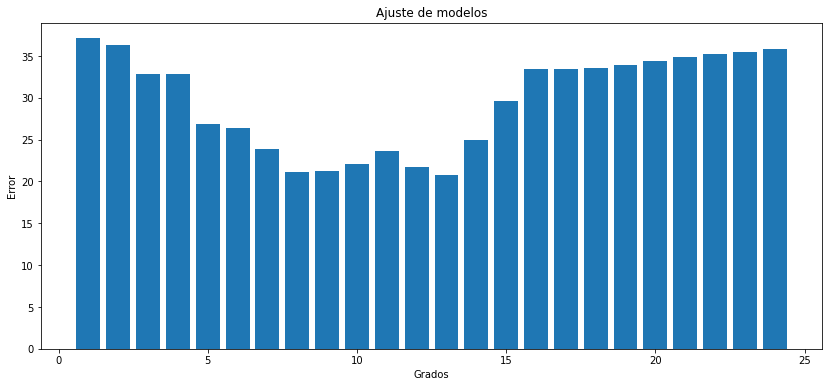

In [ ]:
# Comparacion del rendimiento de los modelos mediante un grafico de barras 
plt.figure(figsize=(14,6))
plt.bar(grados,error_absoluto)
plt.title("Ajuste de modelos")
plt.xlabel("Grados")
plt.ylabel("Error")
plt.show()

Text(0.5, 1.0, 'Degree: 13')

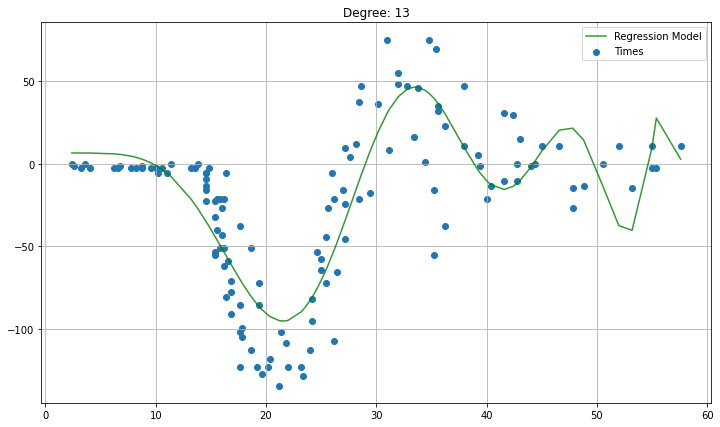

In [ ]:
# Mejor modelo con 13 grados
pr = LinearRegression()
  
polinomio = PolynomialFeatures(degree=13, include_bias=False)
X_pol = polinomio.fit_transform(x)
pr.fit(X_pol, y)
y_pred = pr.predict(X_pol)

plt.figure(figsize=(12, 7))
plt.plot(x, y_pred, color='green', alpha= 0.8, label='Regression Model')
plt.scatter(x, y, label='Times')
plt.legend()
plt.grid()
plt.title(f'Degree: {13}')

#__Cuarto Punto__
____
Utilizando los datos disponibles en [1] encuentre un modelo que se ajuste a los datos utilizando la regresión de Lasso y la regresión de Ridge.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.06529e-41): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


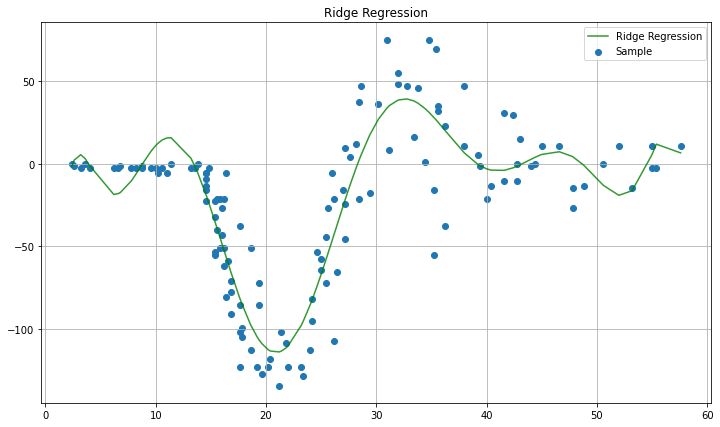

In [ ]:
ridge = Ridge(alpha=0.01)

polinomio = PolynomialFeatures(degree=11, include_bias=False)
X_pol = polinomio.fit_transform(x)

plt.figure(figsize=(12, 7))
ridge.fit(X_pol, y)
ridge_pred = ridge.predict(X_pol)
error_absoluto_ridge =  mean_absolute_error(ridge_pred,y)
plt.scatter(x, y, label='Sample')
plt.plot(x, ridge_pred, color='green', alpha= 0.8, label='Ridge Regression')
plt.legend()
plt.grid()
plt.title('Ridge Regression')
plt.show()

In [ ]:
error_absoluto_ridge

17.221413107323507

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.501e+04, tolerance: 3.082e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


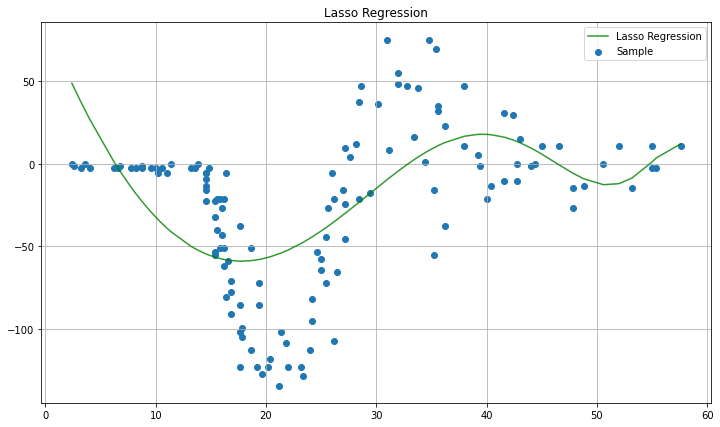

In [ ]:
lasso = Lasso(alpha=1, max_iter= 1000)
polinomioL = PolynomialFeatures(degree=20, include_bias=False)
X_polL = polinomioL.fit_transform(x)

plt.figure(figsize=(12, 7))

lasso.fit(X_polL, y)

lasso_pred = lasso.predict(X_polL)
error_absoluto_lasso =  mean_absolute_error(lasso_pred, y)
plt.scatter(x, y, label='Sample')
plt.plot(x, lasso_pred, color='green', alpha= 0.8, label='Lasso Regression')
plt.legend()
plt.grid()
plt.title('Lasso Regression')
plt.show()

In [ ]:
error_absoluto_lasso

30.623830236286008

#__Quinto Punto__
____
Construya una gráfica que permita comparar los datos con el mejor modelo obtenido en el tercer punto y los modelos obtenidos por Lasso y Ridge. Utilice alguna métrica de regresión para verificar la bondad del ajuste de todos los modelos generados y compárelos a través de un diagrama de barras.

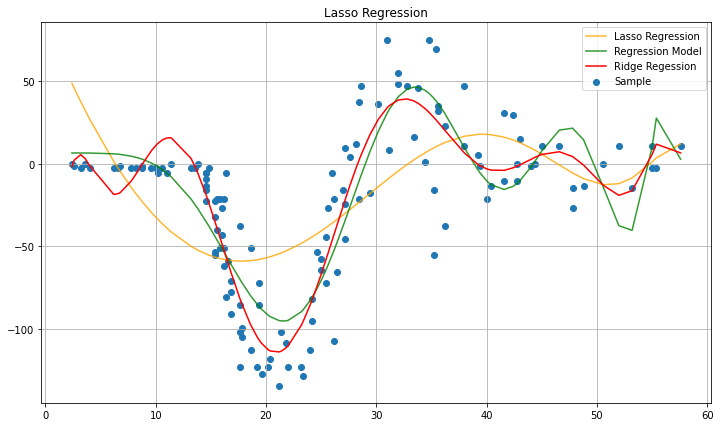

In [ ]:
plt.figure(figsize=(12, 7))

plt.scatter(x, y, label='Sample')
plt.plot(x, lasso_pred, color='orange', alpha= 0.8, label='Lasso Regression')
plt.plot(x, y_pred, color='green', alpha= 0.8, label='Regression Model')
plt.plot(x, ridge_pred, color='red', label='Ridge Regession')
plt.legend()
plt.grid()
plt.title('Lasso Regression')
plt.show()

In [ ]:
errores = [error_absoluto[12],error_absoluto_lasso,error_absoluto_ridge]
errores

[20.77824711278072, 30.623830236286008, 17.221413107323507]

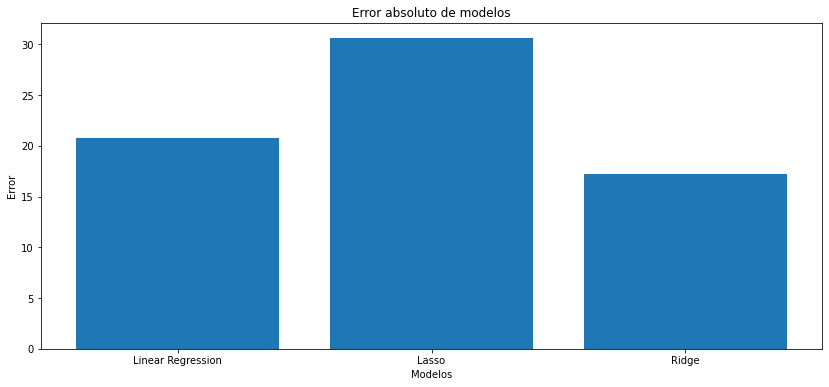

In [ ]:
plt.figure(figsize=(14,6))
plt.bar(["Linear Regression", "Lasso", "Ridge"],errores)
plt.title("Error absoluto de modelos")
plt.xlabel("Modelos")
plt.ylabel("Error")
plt.show()

#__Concluciones__
___